# Calculating relative changes to baseline

Relevant features:
- `mean_pupil_diameter`
- `median_pupil_diameter`
- `blinkrate`
- `fixationrate`

Above mentioned features are quite individual for the participiants. The first test will act as the baseline, since it is the 'easiest' test to perform (i.e. no time constraints and no secondary tasks). With these additional features we can see easier how the difficulty of the tasks affect the pupil diameter, blink rate and fixation rate. 

In [8]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [9]:
data_path1 = '../Data/'
data_path2 = '../data/'

# Check which path exists
if os.path.exists(data_path1):
    data_path = data_path1
elif os.path.exists(data_path2):
    data_path = data_path2
else:
    raise FileNotFoundError("Neither data_path1 nor data_path2 exists")


In [10]:
# load the dataset
file_name = 'augmented_data.csv'
file_path = os.path.join(data_path, file_name)
og_df = pd.read_csv(file_path)
og_df.head(16)

,participant_id,test_id,test_duration,mental,physical,temporal,performance,effort,frustration,mean,mean_pupil_diameter,median_pupil_diameter,blinkrate,fixationrate,visual_acuity_logmar,gender,age,education
0,1,1.0,33.643950,10.0,5.0,15.0,25.0,25.0,10.0,15.0,43.855534,43.893976,0.059446,0.295946,-0.04,0,28.0,18
1,1,2.0,28.484322,50.0,30.0,25.0,50.0,15.0,25.0,32.5,42.935538,43.021599,0.000000,0.175533,-0.04,0,28.0,18
2,1,3.0,71.423823,100.0,10.0,75.0,80.0,90.0,20.0,62.5,44.704459,44.791630,0.196013,0.196018,-0.04,0,28.0,18
3,1,4.0,38.163442,60.0,15.0,45.0,50.0,20.0,25.0,35.8,45.762156,45.845470,0.052406,0.288263,-0.04,0,28.0,18
4,2,1.0,41.748047,20.0,10.0,20.0,10.0,20.0,15.0,15.8,31.492393,31.393101,0.047906,0.143727,-0.10,0,28.0,18
5,2,2.0,29.480232,50.0,10.0,60.0,30.0,30.0,25.0,34.2,33.248339,33.119141,0.000000,0.305280,-0.10,0,28.0,18
6,2,3.0,42.027676,50.0,10.0,20.0,25.0,50.0,20.0,29.2,34.229614,34.143166,0.333114,0.214771,-0.10,0,28.0,18
7,2,4.0,49.023876,85.0,10.0,90.0,90.0,80.0,85.0,73.3,34.969868,35.031067,0.040796,0.265198,-0.10,0,28.0,18
8,3,1.0,42.350301,5.0,5.0,5.0,0.0,5.0,5.0,4.2,31.121870,30.685299,0.141675,0.259758,-0.08,0,38.0,16
9,3,2.0,45.063506,15.0,10.0,10.0,0.0,15.0,5.0,9.2,31.426225,31.307629,0.088764,0.288480,-0.08,0,38.0,16


In [11]:
# replace blinkrate NaN with 0
selected_rows = ['participant_id','test_id','blinkrate']
print(og_df[selected_rows].head())

print('--------------------------')

og_df['blinkrate'] = og_df['blinkrate'].fillna(0)
print(og_df[selected_rows].head())

   participant_id  test_id  blinkrate
0               1      1.0   0.059446
1               1      2.0   0.000000
2               1      3.0   0.196013
3               1      4.0   0.052406
4               2      1.0   0.047906
--------------------------
   participant_id  test_id  blinkrate
0               1      1.0   0.059446
1               1      2.0   0.000000
2               1      3.0   0.196013
3               1      4.0   0.052406
4               2      1.0   0.047906


In [12]:

# add baseline data for further calculations
baseline_df = og_df[og_df['test_id'] == 1]
baseline_df = baseline_df.set_index('participant_id')[['blinkrate', 'fixationrate', 'mean_pupil_diameter', 'median_pupil_diameter']]
baseline_df.columns = [f'{col}_bl' for col in baseline_df.columns]
baseline_df.head()

,blinkrate_bl,fixationrate_bl,mean_pupil_diameter_bl,median_pupil_diameter_bl
participant_id,,,,
1,0.059446,0.295946,43.855534,43.893976
2,0.047906,0.143727,31.492393,31.393101
3,0.141675,0.259758,31.121870,30.685299
4,0.055205,0.220767,30.325795,30.422947
5,0.000000,0.345514,31.569808,31.538508


In [13]:
# merge baseline back into original dataframe
og_df = og_df.join(baseline_df, on='participant_id')
og_df.head()

,participant_id,test_id,test_duration,mental,physical,temporal,performance,effort,frustration,mean,...,blinkrate,fixationrate,visual_acuity_logmar,gender,age,education,blinkrate_bl,fixationrate_bl,mean_pupil_diameter_bl,median_pupil_diameter_bl
0,1,1.0,33.643950,10.0,5.0,15.0,25.0,25.0,10.0,15.0,...,0.059446,0.295946,-0.04,0,28.0,18,0.059446,0.295946,43.855534,43.893976
1,1,2.0,28.484322,50.0,30.0,25.0,50.0,15.0,25.0,32.5,...,0.000000,0.175533,-0.04,0,28.0,18,0.059446,0.295946,43.855534,43.893976
2,1,3.0,71.423823,100.0,10.0,75.0,80.0,90.0,20.0,62.5,...,0.196013,0.196018,-0.04,0,28.0,18,0.059446,0.295946,43.855534,43.893976
3,1,4.0,38.163442,60.0,15.0,45.0,50.0,20.0,25.0,35.8,...,0.052406,0.288263,-0.04,0,28.0,18,0.059446,0.295946,43.855534,43.893976
4,2,1.0,41.748047,20.0,10.0,20.0,10.0,20.0,15.0,15.8,...,0.047906,0.143727,-0.10,0,28.0,18,0.047906,0.143727,31.492393,31.393101


In [14]:
# calculate relative changes to baseline for each participant and test
metrics = ['blinkrate', 'fixationrate', 'mean_pupil_diameter', 'median_pupil_diameter']
for metric in metrics:
    og_df[f'{metric}_rel'] = og_df[metric] - og_df[f'{metric}_bl']

    # calculate percentage change where baseline is not zero, set to NaN where baseline is zero
    og_df[f'{metric}_rel_pct'] = np.where(og_df[f'{metric}_bl'] != 0,
                                       (og_df[f'{metric}_rel'] / og_df[f'{metric}_bl']) * 100,
                                       np.nan)

og_df.head()

,participant_id,test_id,test_duration,mental,physical,temporal,performance,effort,frustration,mean,...,mean_pupil_diameter_bl,median_pupil_diameter_bl,blinkrate_rel,blinkrate_rel_pct,fixationrate_rel,fixationrate_rel_pct,mean_pupil_diameter_rel,mean_pupil_diameter_rel_pct,median_pupil_diameter_rel,median_pupil_diameter_rel_pct
0,1,1.0,33.643950,10.0,5.0,15.0,25.0,25.0,10.0,15.0,...,43.855534,43.893976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2.0,28.484322,50.0,30.0,25.0,50.0,15.0,25.0,32.5,...,43.855534,43.893976,-0.059446,-100.000000,-0.120413,-40.687440,-0.919996,-2.097788,-0.872377,-1.987465
2,1,3.0,71.423823,100.0,10.0,75.0,80.0,90.0,20.0,62.5,...,43.855534,43.893976,0.136567,229.732630,-0.099928,-33.765546,0.848925,1.935731,0.897654,2.045050
3,1,4.0,38.163442,60.0,15.0,45.0,50.0,20.0,25.0,35.8,...,43.855534,43.893976,-0.007040,-11.842464,-0.007684,-2.596309,1.906622,4.347507,1.951494,4.445927
4,2,1.0,41.748047,20.0,10.0,20.0,10.0,20.0,15.0,15.8,...,31.492393,31.393101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# drop baseline from dataset
columns_to_drop = [f'{metric}_bl' for metric in metrics]
og_df.drop(columns=columns_to_drop, inplace=True)

# check columns
print(og_df.columns)

Index(['participant_id', 'test_id', 'test_duration', 'mental', 'physical',
       'temporal', 'performance', 'effort', 'frustration', 'mean',
       'mean_pupil_diameter', 'median_pupil_diameter', 'blinkrate',
       'fixationrate', 'visual_acuity_logmar', 'gender', 'age', 'education',
       'blinkrate_rel', 'blinkrate_rel_pct', 'fixationrate_rel',
       'fixationrate_rel_pct', 'mean_pupil_diameter_rel',
       'mean_pupil_diameter_rel_pct', 'median_pupil_diameter_rel',
       'median_pupil_diameter_rel_pct'],
      dtype='object')


In [17]:
# save new preprocessed dataset as a csv file 
file_name = 'preprocessed_df_v3.csv'
file_path = os.path.join(data_path, file_name)

# only save if file does not exist
if not os.path.exists(file_path):
    og_df.to_csv(file_path, index=False, header=True, encoding='utf-8')
    print('Successfully exported preprocessed_df_v3.csv')
else:
    print('File already exists. Skipping export of preprocessed_df_v3.csv')

File already exists. Skipping export of preprocessed_df_v3.csv


## Dataset Overview


In [18]:

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
dataset_path  = os.path.join(data_path, 'preprocessed_df_v3.csv')
df = pd.read_csv(file_path)

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



Number of samples: 4188
Number of features: 26
Example data:
   participant_id  test_id  test_duration  mental  physical  temporal  \
0               1      1.0      33.643950    10.0       5.0      15.0   
1               1      2.0      28.484322    50.0      30.0      25.0   
2               1      3.0      71.423823   100.0      10.0      75.0   
3               1      4.0      38.163442    60.0      15.0      45.0   
4               2      1.0      41.748047    20.0      10.0      20.0   

   performance  effort  frustration  mean  ...   age  education  \
0         25.0    25.0         10.0  15.0  ...  28.0         18   
1         50.0    15.0         25.0  32.5  ...  28.0         18   
2         80.0    90.0         20.0  62.5  ...  28.0         18   
3         50.0    20.0         25.0  35.8  ...  28.0         18   
4         10.0    20.0         15.0  15.8  ...  28.0         18   

   blinkrate_rel  blinkrate_rel_pct  fixationrate_rel  fixationrate_rel_pct  \
0       0.000000  

## Handling Missing Values

Handling of missing data will be done as preprocessing step before training baseline model and model.

In [19]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

participant_id                    0
test_id                           0
test_duration                     0
mental                            0
physical                          0
temporal                          0
performance                       0
effort                            0
frustration                       0
mean                              0
mean_pupil_diameter               0
median_pupil_diameter             0
blinkrate                         0
fixationrate                      0
visual_acuity_logmar              0
gender                            0
age                               0
education                         0
blinkrate_rel                     0
blinkrate_rel_pct                48
fixationrate_rel                  0
fixationrate_rel_pct              0
mean_pupil_diameter_rel           0
mean_pupil_diameter_rel_pct       0
median_pupil_diameter_rel         0
median_pupil_diameter_rel_pct     0
dtype: int64

## Feature Distributions

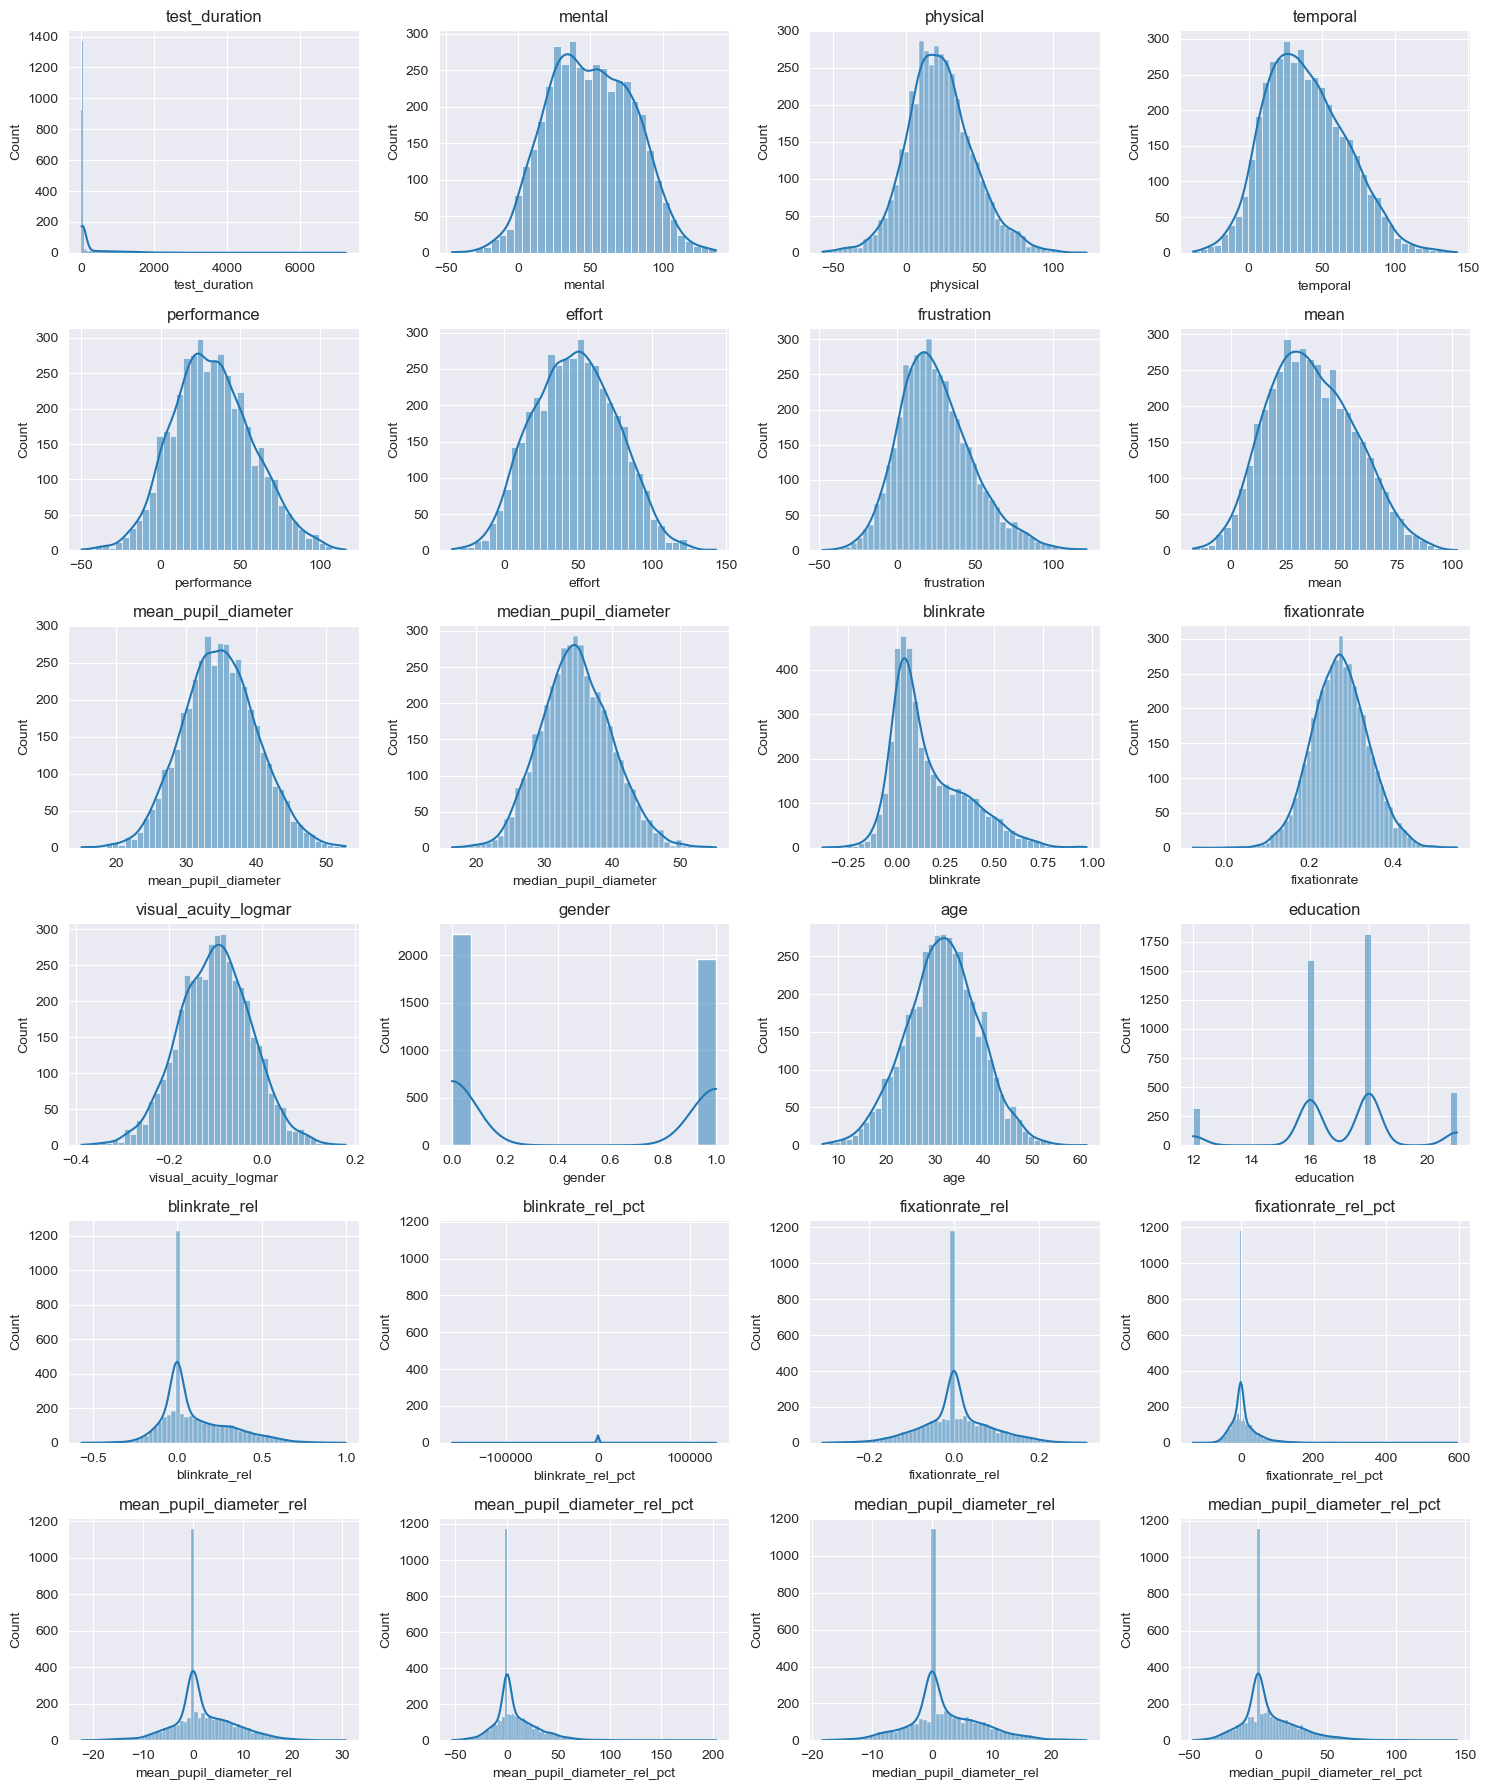

In [20]:
def plot_feature_distributions(dataframe):
    num_features = dataframe.shape[1]
    num_cols = 4
    num_rows = (num_features + num_cols - 1) // num_cols
    
    plt.figure(figsize=(15, num_rows * 3))
    for i, column in enumerate(dataframe.columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(dataframe[column], kde=True)
        plt.title(column)
    plt.tight_layout()
    plt.show()

features = df.drop(['participant_id', 'test_id'], axis=1)

plot_feature_distributions(features)

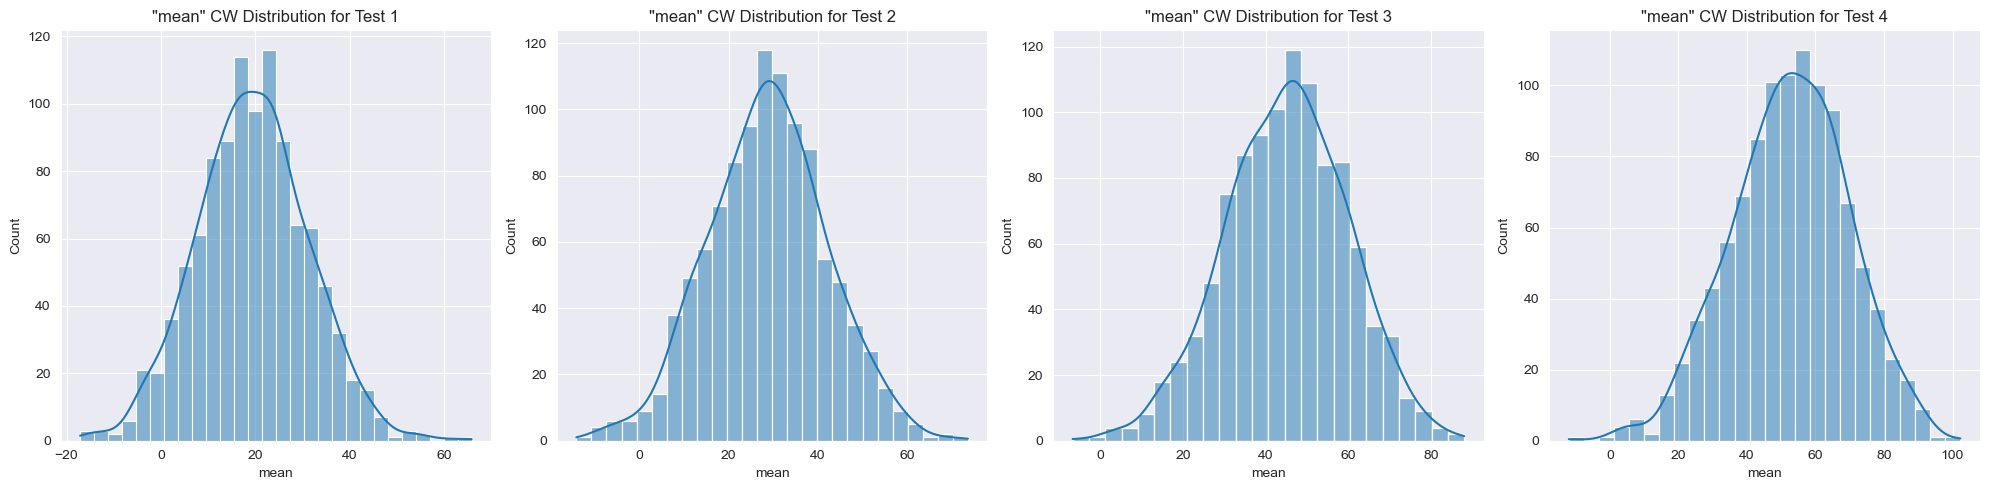

In [21]:
# Check distribution of 'mean' for different test types
data_filtered = df[['test_id', 'mean']]

plt.figure(figsize=(20, 5))  
for i, test_id in enumerate(range(1, 5), 1):
    plt.subplot(1, 4, i)  
    sns.histplot(data=data_filtered[data_filtered['test_id'] == test_id], x='mean', kde=True)
    plt.title(f'"mean" CW Distribution for Test {test_id}')
plt.tight_layout()
plt.show()

## Possible Biases

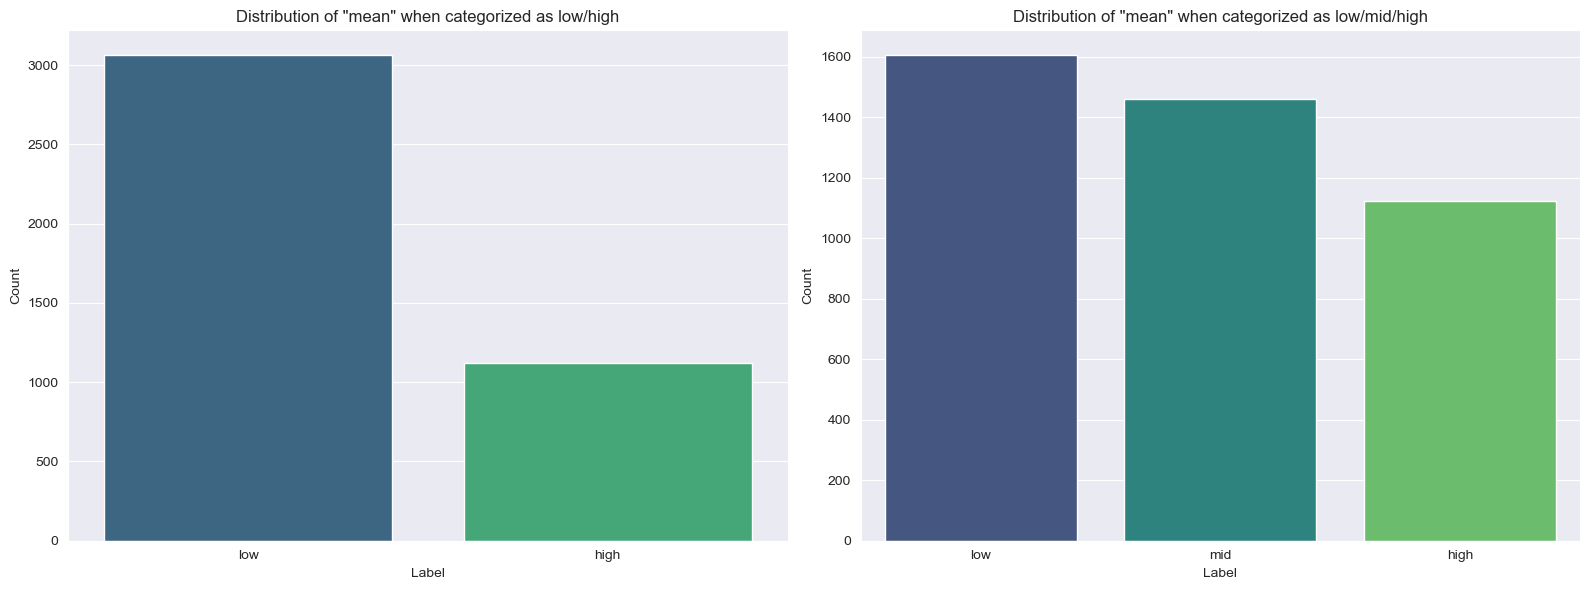

In [22]:
# Multicalss thresholds taken from COLET Paper
y_multiclass = df['mean'].apply(lambda x: 'low' if x <= 29 else ('mid' if x <= 49 else 'high'))
y_binary = df['mean'].apply(lambda x: 'low' if x <= 49 else 'high')

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x=y_binary, hue=y_binary, palette='viridis', legend=False, ax=axs[0])
axs[0].set_title('Distribution of "mean" when categorized as low/high')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Count')

sns.countplot(x=y_multiclass, hue=y_multiclass, palette='viridis', legend=False, ax=axs[1])
axs[1].set_title('Distribution of "mean" when categorized as low/mid/high')
axs[1].set_xlabel('Label')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


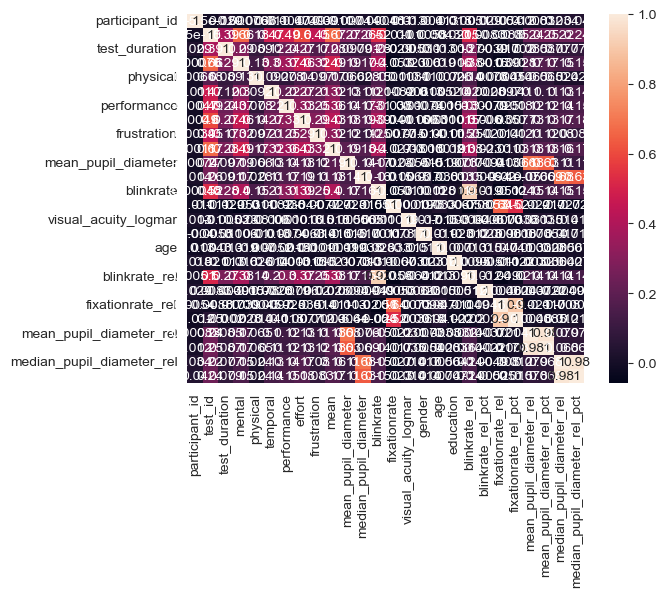

In [23]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
